# Library

In [25]:
import pandas as pd
import numpy as np
from pycaret.classification import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

# Config

In [26]:
DATA_DIR = '../data/'
MODEL_INPUT_DIR = DATA_DIR + '05_model_input/'
MODEL_OUTPUT_DIR = DATA_DIR + '07_model_output/'
DATASET_DIR = 'titanic/'

INPUT_DIR = MODEL_INPUT_DIR + DATASET_DIR
OUTPUT_DIR = MODEL_OUTPUT_DIR + DATASET_DIR

In [27]:
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [28]:
ID_COL = 'PassengerId'
Y_COL = 'Survived'

In [29]:
VERSION = 1

# Load data

In [30]:
base_df = pd.read_pickle(INPUT_DIR + 'train_test_v' + str(VERSION) + '.pkl')
base_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,me_Sex,me_Embarked,me_first_chars_Ticket,fix_Age,Family_Size,Last_Name,fix_Fare,Family_Survival,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.188908,0.336957,0.068966,22.0,1,Braund,7.2500,0.5,"(-0.001, 7.854]","(0.169, 22.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.742038,0.553571,0.646154,38.0,1,Cumings,71.2833,0.5,"(41.579, 512.329]","(36.0, 80.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.742038,0.336957,0.323077,26.0,0,Heikkinen,7.9250,0.5,"(7.854, 10.5]","(22.0, 30.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0.742038,0.336957,0.630137,35.0,1,Futrelle,53.1000,0.0,"(41.579, 512.329]","(30.0, 36.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0.188908,0.336957,0.239203,35.0,0,Allen,8.0500,0.5,"(7.854, 10.5]","(30.0, 36.0]"


# Prepare modeling

In [31]:
for c in base_df.columns:
    print("  '" + c + "',")

  'PassengerId',
  'Survived',
  'Pclass',
  'Name',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked',
  'flg',
  'fix_Name',
  'len_Name',
  'fix_Ticket',
  'len_Ticket',
  'first_chars_Ticket',
  'fix_Cabin',
  'len_Cabin',
  'first_chars_Cabin',
  'me_Sex',
  'me_Embarked',
  'me_first_chars_Ticket',
  'fix_Age',
  'Family_Size',
  'Last_Name',
  'fix_Fare',
  'Family_Survival',
  'FareBin',
  'AgeBin',


In [92]:
feature_cols = [
  # 'PassengerId',
  # 'Survived',
  'Pclass',
  # 'Name',
  'Sex',
  # 'Age',
  # 'SibSp',
  # 'Parch',
  # 'Ticket',
  # 'Fare',
  # 'Cabin',
  # 'Embarked',
  # 'flg',
  # 'fix_Name',
  # 'len_Name',
  # 'fix_Ticket',
  # 'len_Ticket',
  # 'first_chars_Ticket',
  # 'fix_Cabin',
  # 'len_Cabin',
  # 'first_chars_Cabin',
  # 'me_Sex',
  # 'me_Embarked',
  # 'me_first_chars_Ticket',
  # 'fix_Age',
  'Family_Size',
  # 'Last_Name',
  # 'fix_Fare',
  'Family_Survival',
  'FareBin',
  'AgeBin',
]

train_df = base_df[base_df['flg'] == 'train']
test_df = base_df[base_df['flg'] == 'test']

In [93]:
train_df[feature_cols].isnull().sum()

Pclass             0
Sex                0
Family_Size        0
Family_Survival    0
FareBin            0
AgeBin             0
dtype: int64

# Modeling

In [94]:
caret_df = train_df.loc[:, feature_cols + [Y_COL]]
caret_df.head(1)

,Pclass,Sex,Family_Size,Family_Survival,FareBin,AgeBin,Survived
0,3,male,1,0.5,"(-0.001, 7.854]","(0.169, 22.0]",0


In [95]:
s = setup(
    caret_df, 
    target = Y_COL,
    log_experiment = True,
    experiment_name = 'TEST_' + str(VERSION),
    log_plots = True,
    # log_profile = True, # for pandas-profiling?
    log_data = True
)

,Description,Value
0,session_id,2864
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 7)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [96]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8445,0.8834,0.7406,0.8426,0.7842,0.6638,0.6710,0.0310
et,Extra Trees Classifier,0.8364,0.8533,0.7109,0.8440,0.7682,0.6434,0.6519,0.1740
lightgbm,Light Gradient Boosting Machine,0.8300,0.8751,0.7239,0.8193,0.7651,0.6329,0.6391,0.0150
lr,Logistic Regression,0.8284,0.8746,0.7322,0.8150,0.7644,0.6306,0.6389,0.0270
rf,Random Forest Classifier,0.8284,0.8618,0.7319,0.8069,0.7653,0.6307,0.6346,0.2070
ada,Ada Boost Classifier,0.8268,0.8717,0.7322,0.8037,0.7624,0.6270,0.6324,0.0330
ridge,Ridge Classifier,0.8220,0.0000,0.7196,0.8083,0.7564,0.6170,0.6244,0.0050
lda,Linear Discriminant Analysis,0.8204,0.8714,0.7196,0.8045,0.7547,0.6139,0.6210,0.0060
dt,Decision Tree Classifier,0.8140,0.8285,0.6861,0.8058,0.7385,0.5956,0.6024,0.0050
svm,SVM - Linear Kernel,0.7931,0.0000,0.6940,0.7727,0.7169,0.5562,0.5709,0.0080


In [97]:
# lr = create_model('lr')

In [98]:
# lr = tune_model(lr)

In [99]:
# gbc = create_model('gbc')

In [100]:
# gbc = tune_model(gbc)

In [101]:
# ada = create_model('ada')

In [103]:
# lgb = create_model('lightgbm')

In [104]:
# lgb = tune_model(lgb)

In [105]:
# models = [lr, gbc, ada, lgb]
# blend_soft = blend_models(models, method='soft')

In [106]:
# finalize_model(blend_soft)

In [107]:
# plot_model(blend_soft, 'auc')

In [108]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8798,0.5833,0.7368,0.6512,0.4741,0.4816
1,0.8413,0.9081,0.6250,0.9375,0.7500,0.6404,0.6687
2,0.7778,0.8264,0.6250,0.7500,0.6818,0.5132,0.5183
3,0.7419,0.8016,0.5217,0.7059,0.6000,0.4158,0.4261
4,0.7903,0.7928,0.7500,0.7200,0.7347,0.5615,0.5618
5,0.7903,0.8514,0.5833,0.8235,0.6829,0.5330,0.5507
6,0.7742,0.8427,0.7083,0.7083,0.7083,0.5241,0.5241
7,0.8065,0.8520,0.8333,0.7143,0.7692,0.6043,0.6096
8,0.6935,0.7966,0.6667,0.5926,0.6275,0.3687,0.3705


In [110]:
finalize_model(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

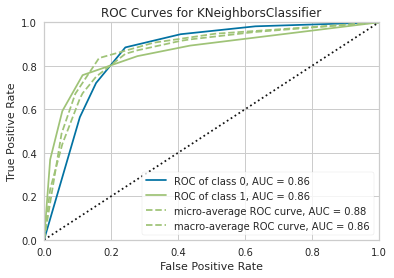

In [111]:
plot_model(knn, 'auc')

# Experiment logging

In [ ]:
!mlflow ui --host 0.0.0.0

[2022-04-14 17:18:07 +0900] [8101] [INFO] Starting gunicorn 20.1.0
[2022-04-14 17:18:07 +0900] [8101] [INFO] Listening at: http://0.0.0.0:5000 (8101)
[2022-04-14 17:18:07 +0900] [8101] [INFO] Using worker: sync
[2022-04-14 17:18:07 +0900] [8103] [INFO] Booting worker with pid: 8103
[2022-04-14 19:20:23 +0900] [8101] [CRITICAL] WORKER TIMEOUT (pid:8103)
[2022-04-14 19:20:23 +0900] [8103] [INFO] Worker exiting (pid: 8103)
[2022-04-14 19:20:23 +0900] [8111] [INFO] Booting worker with pid: 8111
[2022-04-14 21:14:52 +0900] [8101] [CRITICAL] WORKER TIMEOUT (pid:8111)
[2022-04-14 21:14:52 +0900] [8111] [INFO] Worker exiting (pid: 8111)
[2022-04-14 21:14:54 +0900] [8101] [WARNING] Worker with pid 8111 was terminated due to signal 9
[2022-04-14 21:14:54 +0900] [8119] [INFO] Booting worker with pid: 8119
[2022-04-14 23:30:16 +0900] [8101] [CRITICAL] WORKER TIMEOUT (pid:8119)
[2022-04-14 23:30:16 +0900] [8119] [INFO] Worker exiting (pid: 8119)
[2022-04-14 23:30:17 +0900] [8127] [INFO] Booting wor

# Submission

In [113]:
# blend_soft

In [114]:
# predictions = predict_model(blend_soft, test_df.loc[:, feature_cols])
predictions = predict_model(knn, test_df.loc[:, feature_cols])
test_df[Y_COL] = predictions['Label']
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,me_Sex,me_Embarked,me_first_chars_Ticket,fix_Age,Family_Size,Last_Name,fix_Fare,Family_Survival,FareBin,AgeBin
891,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,...,0.188908,0.389610,0.239203,34.5,0,Kelly,7.8292,0.5,"(-0.001, 7.854]","(30.0, 36.0]"
892,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,...,0.742038,0.336957,0.239203,47.0,1,Wilkes,7.0000,0.5,"(-0.001, 7.854]","(36.0, 80.0]"
893,894,1,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,...,0.188908,0.389610,0.464481,62.0,0,Myles,9.6875,0.5,"(7.854, 10.5]","(36.0, 80.0]"
894,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,...,0.188908,0.336957,0.239203,27.0,0,Wirz,8.6625,0.5,"(7.854, 10.5]","(22.0, 30.0]"
895,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,...,0.742038,0.336957,0.239203,22.0,2,Hirvonen,12.2875,1.0,"(10.5, 21.679]","(0.169, 22.0]"


In [115]:
test_df.loc[:, [ID_COL, Y_COL]].to_csv(OUTPUT_DIR + 'submission_v' + str(VERSION) + '.csv', index=False)